In [147]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import random as rnd

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [149]:
train_df = ("train.csv")
test_df = ("test.csv")

In [150]:
train_df = pd.read_csv(train_df)
test_df = pd.read_csv(test_df)

In [151]:
combine = [train_df,test_df]

In [152]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [153]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [154]:
test_df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kennedy, Mr. John",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [155]:
women = train_df.loc[train_df.Sex=='female']['Survived']
rate_women = sum(women)/len(women)*100
print('Women Survived',rate_women, '%')

Women Survived 74.20382165605095 %


In [156]:
men = train_df.loc[train_df.Sex=='male']['Survived']
rate_men = sum(men)/len(men)*100
print('Men Survived',rate_men, '%')

Men Survived 18.890814558058924 %


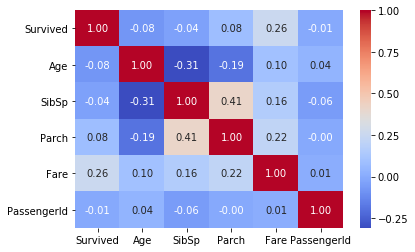

In [157]:
#HEAT MAP FOR FEATURES
C_matrix = sns.heatmap(train_df[['Survived', 'Age', 'SibSp',
       'Parch',  'Fare', 'PassengerId']].corr(),
                       annot=True,fmt='.2f',cmap ='coolwarm')

/Users/anasawadalla/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/anasawadalla/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


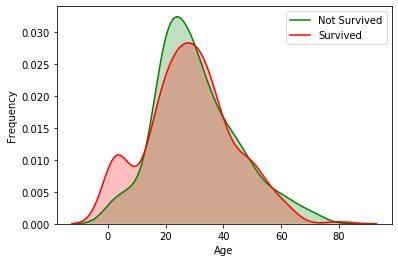

In [158]:
#AGE To SURVIVAL
g = sns.kdeplot(train_df['Age'][(train_df['Survived']==0 & train_df['Age'].notnull())],
                color = 'green',shade =  True)
g = sns.kdeplot(train_df['Age'][(train_df['Survived']==1 & train_df['Age'].notnull())],
                color = 'Red',shade =  True)
g.set_xlabel('Age')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived','Survived'])

In [159]:
#PassengerId has no corrolation to survival
train_df = train_df.drop(['PassengerId'],axis=1)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

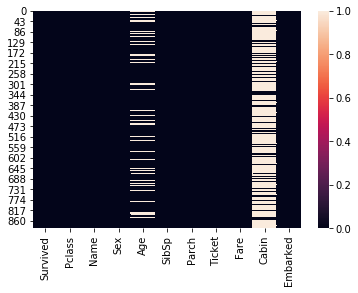

In [160]:
#Missing Values
sns.heatmap(train_df.isnull())
train_df.isnull().sum()

In [161]:
#Remap cabin to new feature deck
import re
deck = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data = [train_df,test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna('H0')
    dataset['Deck']  = dataset['Cabin'].map(lambda x: re.compile('([a-z,A-Z]+)').search(x).group())
    dataset['Deck']  = dataset['Deck'].map(deck)
    dataset['Deck']  = dataset['Deck'].fillna(0)
    dataset['Deck']  = dataset['Deck'].astype(int)

In [162]:
train_df = train_df.drop(['Cabin'],axis = 1)
test_df = test_df.drop(['Cabin'],axis = 1)

In [163]:
#Fill in missing age vals
age_df = [train_df,test_df]
for data in age_df:
    mean = train_df['Age'].mean()
    std = test_df['Age'].std()
    is_null = data['Age'].isnull().sum()
    # generate random numbers
    age_rand = np.random.randint(mean - std,mean + std,size = is_null)
    age_copy = data['Age'].copy()
    age_copy[np.isnan(age_copy)] = age_rand
    data['Age'] = age_copy
    data['Age'] = train_df['Age'].astype(int)

In [164]:
#Fill in missing Embarked
top = 'S'
data = [train_df,test_df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(top)

In [165]:
#Fill in missing fare
data= [train_df,test_df]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [166]:
#New feature title based on name
data = [train_df,test_df]
Title = {'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand = False)
#Replace title with more common one
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr', 
                                                'Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    dataset['Title'] = dataset['Title'].map(Title)
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'],axis = 1)
test_df = test_df.drop(['Name'],axis = 1)

In [167]:
#Give gender a numerical value
gender = {'male':0,'female':1}
data = [train_df,test_df]

for dataset in data:
    dataset['Sex'] =dataset['Sex'].map(gender)

In [168]:
#Give port boarded @ a numerical value
port = {'S':0,'C':1,'Q':2}
data = [train_df,test_df]

for dataset in data:
    dataset['Embarked'] =dataset['Embarked'].map(port)

In [169]:
#Drop ticket feature because there is a wide specturm of unique values
train_df = train_df.drop(['Ticket'],axis = 1)
test_df = test_df.drop(['Ticket'],axis = 1)

In [170]:
#Give age a numerical value
data = [train_df,test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <=11,'Age'] =0
    dataset.loc[(dataset['Age'] >11) & (dataset['Age']<=18),'Age'] = 1
    dataset.loc[(dataset['Age'] >18) & (dataset['Age']<=22),'Age'] = 2
    dataset.loc[(dataset['Age'] >22) & (dataset['Age']<=27),'Age'] = 3
    dataset.loc[(dataset['Age'] >27) & (dataset['Age']<=33),'Age'] = 4
    dataset.loc[(dataset['Age'] >33) & (dataset['Age']<=40),'Age'] = 5
    dataset.loc[(dataset['Age'] >40) & (dataset['Age']<=66),'Age'] = 6
    dataset.loc[dataset['Age']>66,'Age'] = 6
    

plt.hist(train_df['Fare'],bins = 30)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Distribution of Fare')
plt.show()

#Distribution is too skewed to the left
train_df['Fare'] = pd.qcut(train_df['Fare'],4)
lbl = LabelEncoder()
train_df['Fare'] = lbl.fit_transform(train_df['Fare'])
test_df['Fare'] = pd.qcut(test_df['Fare'],4)
lbl = LabelEncoder()
test_df['Fare'] = lbl.fit_transform(test_df['Fare'])
plt.hist(train_df['Fare'],bins = 30)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Distribution of Fare')
plt.show()

In [171]:
X_train = train_df.drop('Survived',axis = 1)
y_train = train_df['Survived']
X_test = test_df.drop('PassengerId',axis = 1).copy()
# Logisitic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

/Users/anasawadalla/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [172]:
#Accuracy
logistic_accuracy = logreg.score(X_train,y_train)*100
print(logistic_accuracy,'%')

81.14478114478115 %


In [173]:
#Decesion Tree (Most Accurate Model)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
y_pred = decision_tree.predict(X_test)
#Accuracy
decision_tree_accuracy = decision_tree.score(X_train,y_train) * 100
print(decision_tree_accuracy,'%')

94.61279461279462 %


In [174]:
submission = pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':y_pred
    })
submission.to_csv('submission.csv',index = False)